# Calcul des Coformes pour le lexique complet

In [1]:
# -*- coding: utf8 -*-
import pandas as pd
import pickle, glob
import itertools as it
import networkx as nx
import random as rd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
lexiquePrefix="MGC-160104"

# Calcul pour les cases brutes

In [3]:
with open("/Users/gilles/Box Sync/2015-Data/MGC-Vienna/"+lexiquePrefix+'-Verbes2.pkl', 'rb') as input:
    lexique = pickle.load(input)

In [ ]:
nbCases=lexique.groupby(by=["lexeme","case"],as_index=False)["phono"].count()
nbFormes=nbCases.groupby(by=["lexeme"],as_index=True)[["case"]].count()
if len(nbFormes.columns)==2:
    nbFormes.columns=["lexeme","nbFormes"]
else:
    nbFormes.columns=["nbFormes"]

In [ ]:
dictNbFormes=nbFormes.to_dict()["nbFormes"]

In [ ]:
with open("/Users/gilles/Box Sync/2015-Data/MGC-Vienna/"+lexiquePrefix+'-Verbes2-NbForms.pkl', 'wb') as output:
    pickle.dump(dictNbFormes, output, pickle.HIGHEST_PROTOCOL)

# Calcul pour les cases morphomiques

In [ ]:
listeLexiquesMorphomiques=glob.glob("/Users/gilles/Box Sync/2015-Data/MGC-Vienna/*-Verbes2-*-Morphomes.pkl")
nomLexiqueMorphomique=listeLexiquesMorphomiques[0]

In [ ]:
with open(nomLexiqueMorphomique, 'rb') as input:
    lexique = pickle.load(input)

In [ ]:
nbCases=lexique.groupby(by=["lexeme","case"],as_index=False)["phono"].count()
nbFormes=nbCases.groupby(by=["lexeme"],as_index=True)[["case"]].count()
if len(nbFormes.columns)==2:
    nbFormes.columns=["lexeme","nbFormes"]
else:
    nbFormes.columns=["nbFormes"]

In [ ]:
dictNbFormes=nbFormes.to_dict()["nbFormes"]
dictNbFormes

In [ ]:
with open(nomLexiqueMorphomique.replace(".pkl","-nbForms.pkl"), 'wb') as output:
    pickle.dump(dictNbFormes, output, pickle.HIGHEST_PROTOCOL)

## Statistiques sur le lexique complet

## Préparation du lexique

In [4]:
%matplotlib inline
#from __future__ import unicode_literals

### Standardisation de la notation API

In [5]:
# traduire SAMPA-BDLex en API

def sampa2api(sampa):
    if isinstance(sampa,str):
        api=sampa.decode("utf8")
    else:
        api=sampa
    api=api.replace(u'n"',u'n') 
    api=api.replace(u't"',u't') 
    api=api.replace(u'z"',u'z') 
    api=api.replace(u'R"',u'ʁ') 
    api=api.replace(u'p"',u'p') 
    api=api.replace(u'S',u'ʃ') 
    api=api.replace(u'Z',u'ʒ')
    api=api.replace(u'N',u'ŋ')
    api=api.replace(u'J',u'ɲ')
    api=api.replace(u'r',u'ʁ') 
    api=api.replace(u'H',u'ɥ')
    api=api.replace(u'E',u'ɛ')
    api=api.replace(u'2',u'ø')
    api=api.replace(u'9',u'œ')
    api=api.replace(u'6',u'ə')
    api=api.replace(u'O',u'ɔ')
    api=api.replace(u'è',u'e')   
    api=api.replace(u'ò',u'o')    
    api=api.replace(u'â',u'ɑ̃')   
    api=api.replace(u'ê',u'ɛ̃')   
    api=api.replace(u'û',u'œ̃')  
    api=api.replace(u'ô',u'ɔ̃')       
    api=api.replace(u'@',u'ə')
    api=api.replace(u'R',u'ʁ') 
    return api

In [6]:
lexique["phono"]=lexique["phono"].apply(sampa2api)

## Ajout de l'information Case

In [7]:
lexique["case"]=lexique["vs"]+lexique["ms"]
#lexique

# Distribution des fréquences

## Distribution par lexème, par forme

In [58]:
freqLexemes=lexique.groupby(by="lexeme",as_index=False)["freq"].sum().sort_values(by="freq",ascending=False)
freqLexemes.reset_index(inplace=True)
freqFormes=lexique.groupby(by=["lexeme","case"],as_index=False).agg({"phono":" ".join, "freq":sum}).sort_values(by="freq",ascending=False)
freqFormes.reset_index(inplace=True)
freqFormes["id"]=freqFormes["lexeme"]+u" — "+freqFormes["case"]

In [59]:
zipf=freqLexemes["freq"].max()
freqLexemes["zipf"]=zipf/(freqLexemes.index+1)
zipf=freqFormes["freq"].max()
freqFormes["zipf"]=zipf/(freqFormes.index+1)

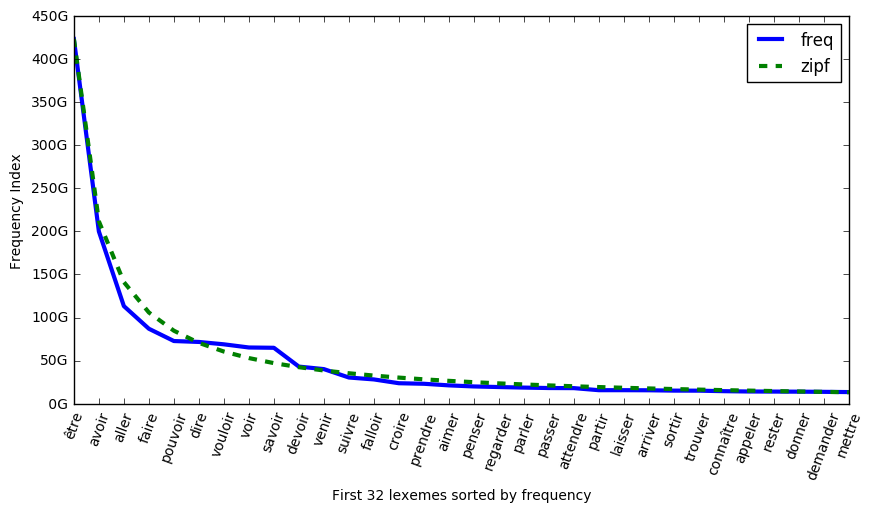

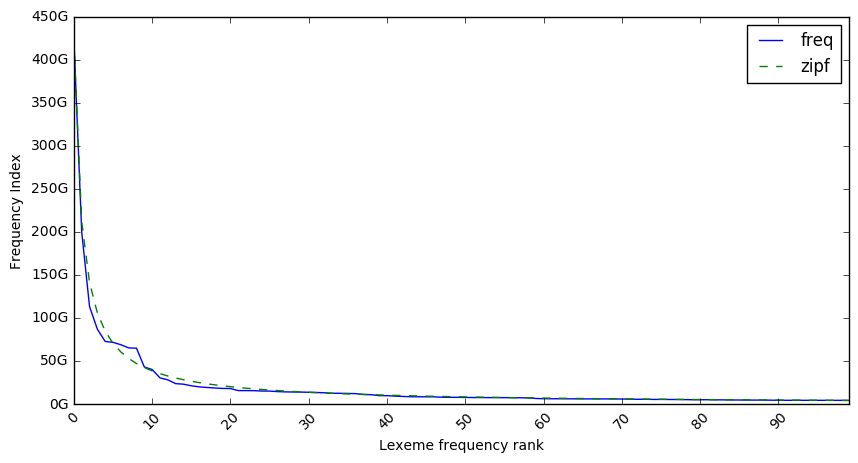

In [60]:
morceauTaille=32
step=1
ax=freqLexemes[:morceauTaille][["freq","zipf"]].plot(kind="line",style=['-', '--'],figsize=(10, 5),rot=70,linewidth=3,xticks=[step*k for k in range(morceauTaille/step)])
ax.set_xticklabels(freqLexemes[:morceauTaille]["lexeme"])
yticks=ax.get_yticks()
yticks=["%2dG"%(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
plt.xlabel('First %d lexemes sorted by frequency'%morceauTaille)
plt.ylabel('Frequency Index')
plt.show()
morceauTaille=100
step=10
ax=freqLexemes[:morceauTaille][["freq","zipf"]].plot(kind="line",rot=45,style=['-', '--'],figsize=(10, 5),linewidth=1,xticks=[step*k for k in range(morceauTaille/step)])
yticks=ax.get_yticks()
yticks=["%dG"%int(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
plt.xlabel('Lexeme frequency rank')
plt.ylabel('Frequency Index')
plt.show()
#morceauTaille=1250
#step=40
#freqLexemes[-morceauTaille:]["freq"].plot(kind="line",rot=45,figsize=(10, 5),linewidth=3)

In [115]:
specialLexemes=freqLexemes[:32]["lexeme"].tolist()

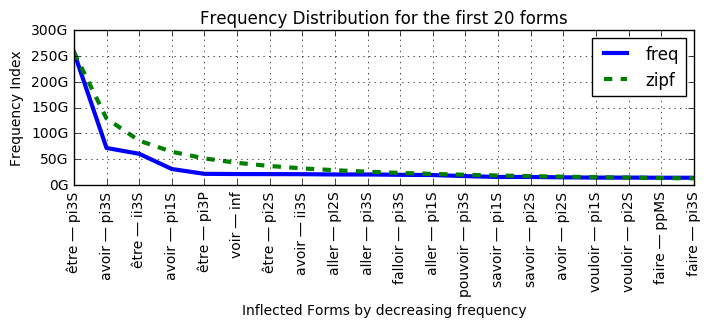

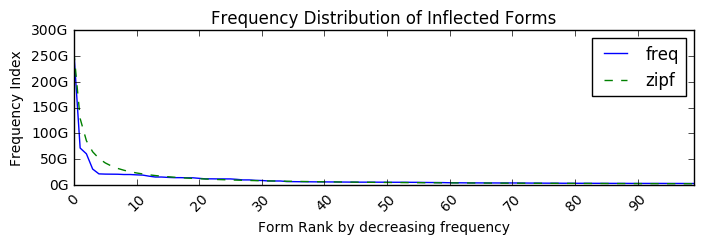

In [116]:
morceauTaille=20
step=1
ax=freqFormes[:morceauTaille][["freq","zipf"]].plot(kind="line",style=['-', '--'],figsize=(8, 2),rot=90,linewidth=3,xticks=[step*k for k in range(morceauTaille/step)])
ax.set_xticklabels(freqFormes[:morceauTaille]["id"])
yticks=ax.get_yticks()
yticks=["%dG"%int(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
#plt.xticks(fontname=u"Arial")
plt.xlabel('Inflected Forms by decreasing frequency')
plt.ylabel('Frequency Index')
plt.title('Frequency Distribution for the first %d forms'%morceauTaille)
plt.grid()
plt.show()
morceauTaille=100
step=10
ax=freqFormes[:morceauTaille][["freq","zipf"]].plot(kind="line",style=['-', '--'],rot=45,figsize=(8, 2),linewidth=1,xticks=[step*k for k in range(morceauTaille/step)])
yticks=ax.get_yticks()
yticks=["%dG"%int(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
plt.xlabel('Form Rank by decreasing frequency')
plt.ylabel('Frequency Index')
plt.title('Frequency Distribution of Inflected Forms')
plt.show()

## Distribution par case

In [8]:
freqCases=lexique.groupby(by="case",as_index=False)["freq"].sum().sort_values(by="freq",ascending=False)
freqCases.reset_index(inplace=True)
zipf=freqCases["freq"].max()
freqCases["zipf"]=zipf/(freqCases.index+1)

freqCases

,index,case,freq,zipf
0,40,pi3S,5.936957e+12,5.936957e+12
1,18,inf,4.061536e+12,2.968479e+12
2,44,ppMS,2.966083e+12,1.978986e+12
3,17,ii3S,2.633226e+12,1.484239e+12
4,36,pi1S,2.262139e+12,1.187391e+12
5,27,pI2S,1.540936e+12,9.894929e+11
6,38,pi2S,1.431573e+12,8.481368e+11
7,5,ai3S,1.199760e+12,7.421197e+11
8,39,pi3P,8.856585e+11,6.596619e+11
9,37,pi2P,8.212672e+11,5.936957e+11


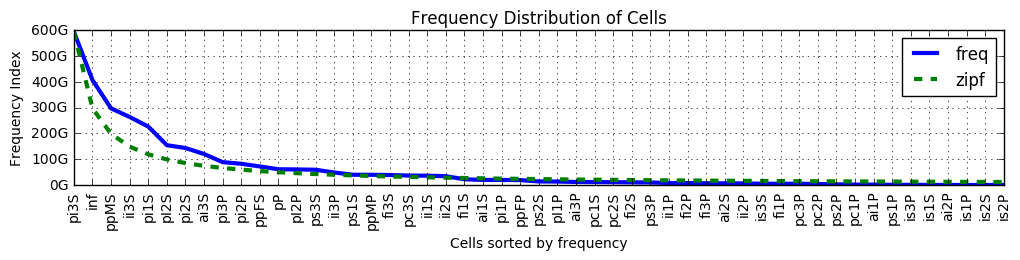

In [9]:
ax=freqCases[["freq","zipf"]].plot(kind="line",style=['-', '--'],figsize=(12, 2),rot=90,linewidth=3,xticks=range(51))
ax.set_xticklabels(freqCases["case"])
plt.grid()
yticks=ax.get_yticks()
yticks=["%dG"%(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
plt.xlabel('Cells sorted by frequency')
plt.ylabel('Frequency Index')
plt.title('Frequency Distribution of Cells')
plt.show()

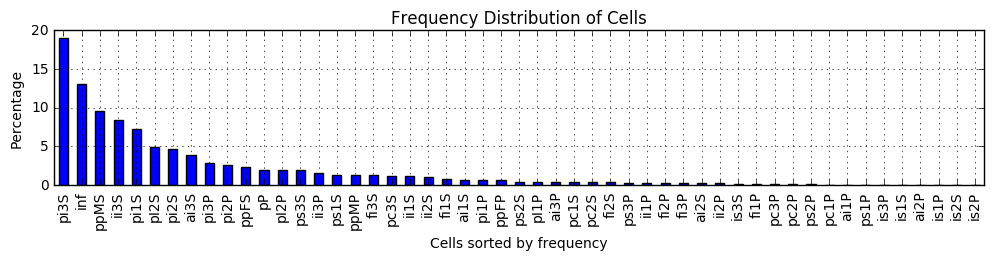

48727.4176586


,case,prop
0,pi3S,19.030399
1,inf,13.018899
2,ppMS,9.507521
3,ii3S,8.440577
4,pi1S,7.251091
5,pI2S,4.939334
6,pi2S,4.588782
7,ai3S,3.845724
8,pi3P,2.838901
9,pi2P,2.632500


In [20]:
freqSomme=freqCases["freq"].sum()
freqCases["prop"]=freqCases["freq"]/freqSomme*100
ax=freqCases["prop"].plot(kind="bar",figsize=(12, 2),rot=90,xticks=range(51))
ax.set_xticklabels(freqCases["case"])
plt.grid()
#yticks=ax.get_yticks()
#yticks=["%dG"%(y/10e9) for y in yticks]
#ax.set_yticklabels(yticks)
plt.xlabel('Cells sorted by frequency')
plt.ylabel('Percentage')
plt.title('Frequency Distribution of Cells')
plt.show()
print freqCases.ix[0]["prop"]/freqCases.ix[50]["prop"]
freqCases[["case","prop"]]

In [130]:
sFreqCases=freqCases.sort_values(by="case")
sFreqCasesSum=sFreqCases["freq"].sum()
sFreqCases["percent"]=sFreqCases["freq"]/sFreqCasesSum

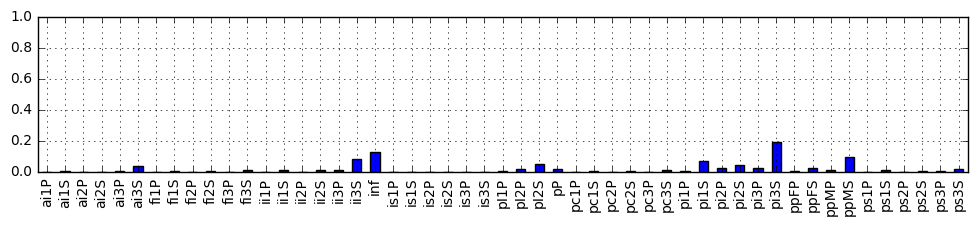

In [132]:
ax=sFreqCases["percent"].plot(kind="bar",figsize=(12, 2))
ax.set_xticklabels(sFreqCases["case"])
ax.set_ylim([0,1])
plt.grid()
plt.show()

In [ ]:
ai3S=lexique[lexique["case"]=="ai3S"].sort_values(by="freq",ascending=False).reset_index()
ax=ai3S["freq"][:50].plot()

# Distribution des cases par lexème

In [10]:
def lexique2Paradigmes(lexique):
    return pd.pivot_table(lexique, values='freq', index=['lexeme'], columns=['case'], aggfunc=lambda x: sum(x)).reset_index().reindex()

In [11]:
paradigme=lexique2Paradigmes(lexique)

In [12]:
paradigme["freqLexeme"]=paradigme.sum(axis=1,numeric_only=True)

In [13]:
cases=paradigme.columns.tolist()
cases.remove("lexeme")
cases.remove("freqLexeme")
cases
for case in cases:
    paradigme[case]=paradigme[case]/paradigme["freqLexeme"]

In [14]:
if "lexeme" in paradigme.columns:
    lexemeLabels=paradigme["lexeme"].tolist()
    del paradigme["lexeme"]
if "freqLexeme" in paradigme.columns:
    del paradigme["freqLexeme"]

In [15]:
if "case" in paradigme.columns:
    del paradigme["case"]
paradigme.fillna(value=0,inplace=True)

In [36]:
data_raw=paradigme.iloc[:].values
data_raw

array([[  1.00040952e-06,   7.40398860e-03,   1.00040952e-06, ...,
          1.00040952e-06,   1.00040952e-06,   1.00040952e-06],
       [  1.12842216e-03,   1.01557994e-02,   1.00015817e-06, ...,
          8.90199702e-03,   1.06155270e-02,   4.13336857e-02],
       [  9.99953002e-07,   9.99953002e-07,   9.99953002e-07, ...,
          9.99953002e-07,   9.99953002e-07,   9.99953002e-07],
       ..., 
       [  1.64625446e-03,   7.99609307e-03,   1.00045235e-06, ...,
          1.00045235e-06,   1.00045235e-06,   1.00045235e-06],
       [  1.16659200e-04,   2.47015229e-04,   1.79475692e-05, ...,
          1.92818293e-03,   1.56616157e-03,   1.14928204e-02],
       [  1.00083060e-06,   1.15683292e-02,   1.00083060e-06, ...,
          1.00083060e-06,   1.00083060e-06,   1.00083060e-06]])

In [37]:
from sklearn import preprocessing
data=preprocessing.normalize(data_raw)
data

array([[  3.26617978e-06,   2.41728586e-02,   3.26617978e-06, ...,
          3.26617978e-06,   3.26617978e-06,   3.26617978e-06],
       [  3.35658668e-03,   3.02092801e-02,   2.97505466e-06, ...,
          2.64797394e-02,   3.15767784e-02,   1.22950527e-01],
       [  1.38229605e-06,   1.38229605e-06,   1.38229605e-06, ...,
          1.38229605e-06,   1.38229605e-06,   1.38229605e-06],
       ..., 
       [  5.03255696e-03,   2.44438481e-02,   3.05835676e-06, ...,
          3.05835676e-06,   3.05835676e-06,   3.05835676e-06],
       [  1.85250261e-04,   3.92250552e-04,   2.85000401e-05, ...,
          3.06187931e-03,   2.48700350e-03,   1.82501507e-02],
       [  2.77371971e-06,   3.20606732e-02,   2.77371971e-06, ...,
          2.77371971e-06,   2.77371971e-06,   2.77371971e-06]])

In [18]:
def dendrogramLabels(id):
    return lexemeLabels[id]

In [19]:
dendrogramLabels(0)

u'abaisser'

In [20]:
import sys
sys.getrecursionlimit()

1000

In [21]:
sys.setrecursionlimit(10000)

In [38]:
from scipy.cluster import hierarchy as hc
Z=hc.linkage(data,method='ward')

In [50]:
plt.figure(figsize=(400,20),dpi=80)
#%time dendrogram = hc.dendrogram(Z,truncate_mode="lastp",p=50)
%time dendrogram = hc.dendrogram(Z,leaf_label_func=dendrogramLabels,leaf_font_size=5.)
plt.show()

CPU times: user 10.1 s, sys: 385 ms, total: 10.5 s
Wall time: 10.5 s


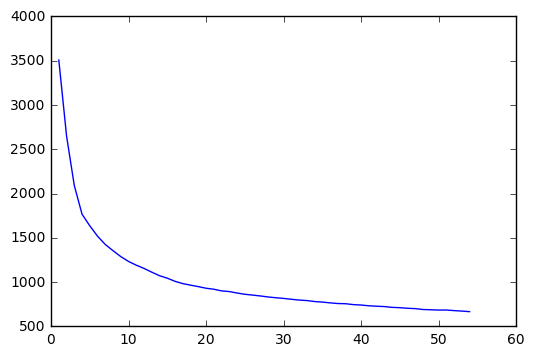

In [68]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,55):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,55),wcss)
plt.show()

In [103]:
nclusters=16
kmeans=KMeans(n_clusters=nclusters,init="k-means++")
y_kmeans=kmeans.fit_predict(data)

In [104]:
lexemeType={}
for nY,y in enumerate(y_kmeans):
    lexemeType[lexemeLabels[nY]]=y
#specialLexemes=[u"être",u"avoir",u"pouvoir",u"savoir",u"faire"]
for lex in specialLexemes:
    print lex,lexemeType[lex]

être 14
avoir 14
aller 9
faire 1
pouvoir 9
dire 6
vouloir 9
voir 3
savoir 9
devoir 9
venir 9
suivre 9
falloir 14
croire 9
prendre 9
aimer 9
penser 9
regarder 9
parler 9
passer 9
attendre 9
partir 3
laisser 9
arriver 9
sortir 3
trouver 1
connaître 9
appeler 9
rester 9
donner 9
demander 6
mettre 6


In [105]:
allLexemes=True
typeLexemes = {}
for k, v in lexemeType.iteritems():
    if k in specialLexemes or allLexemes:
        typeLexemes[v] = typeLexemes.get(v, [])
        typeLexemes[v].append(k)

In [163]:
pdKMeans=pd.DataFrame(kmeans.cluster_centers_,columns=paradigme.columns).transpose()

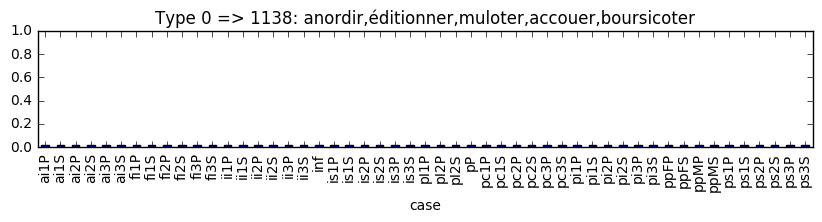

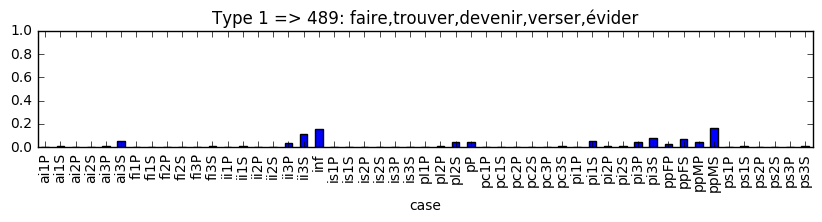

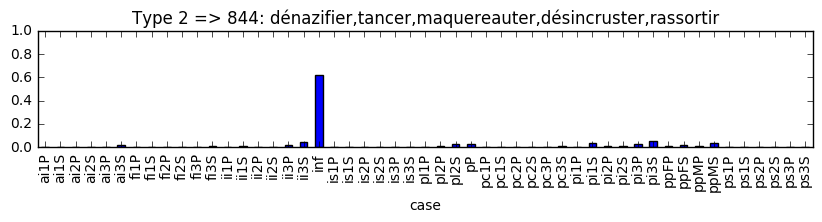

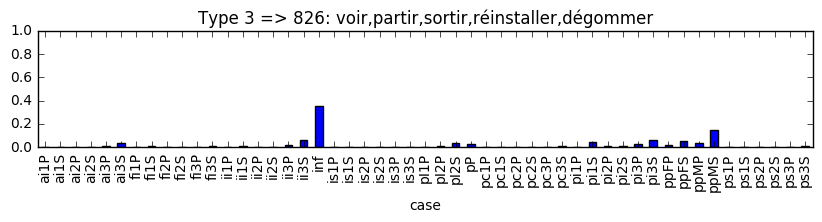

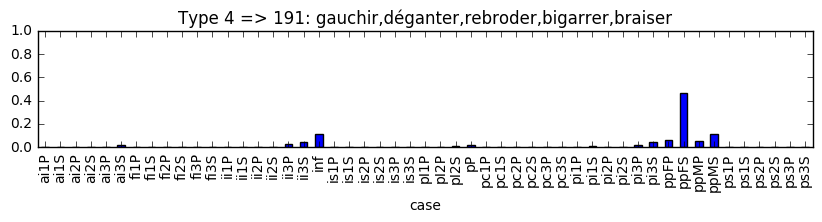

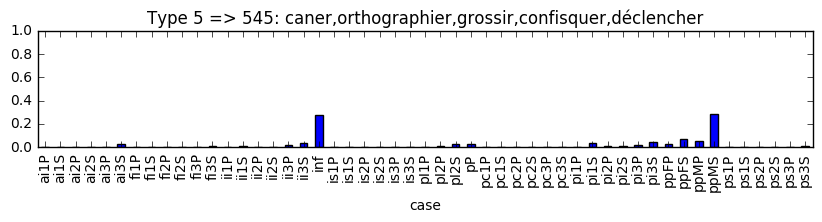

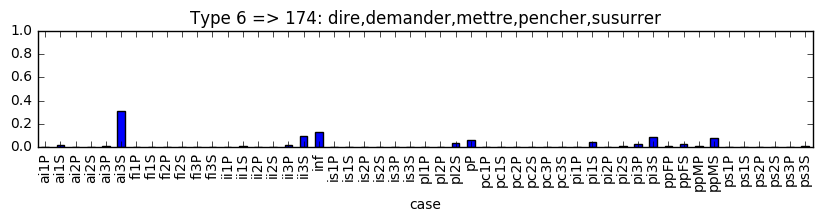

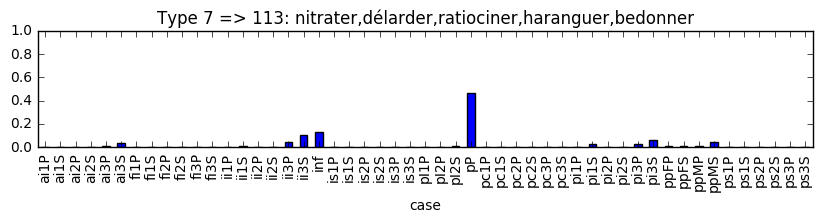

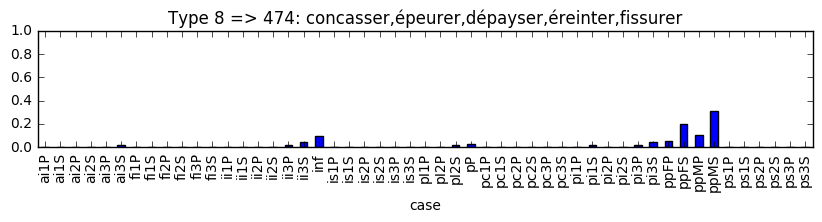

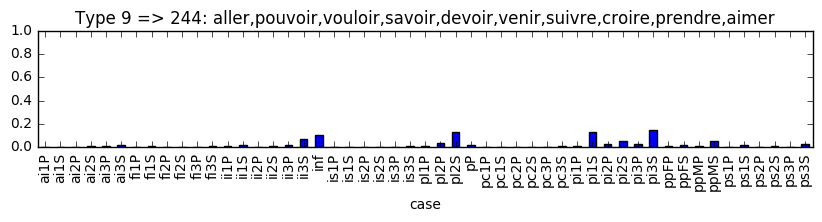

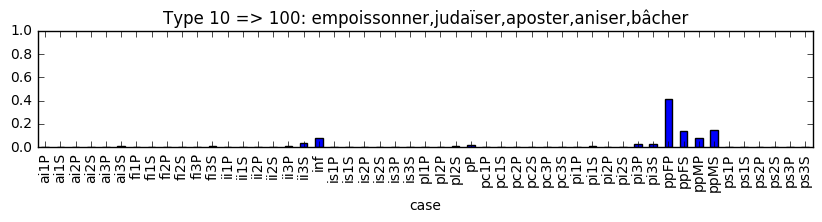

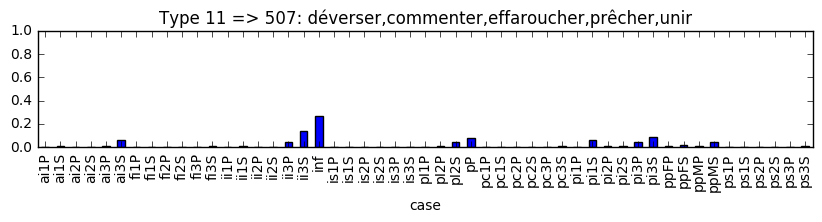

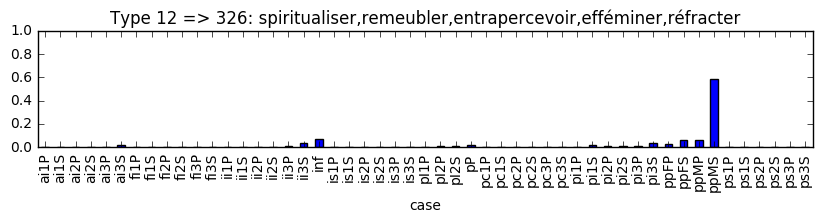

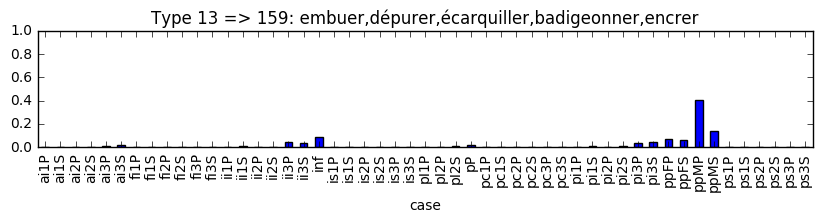

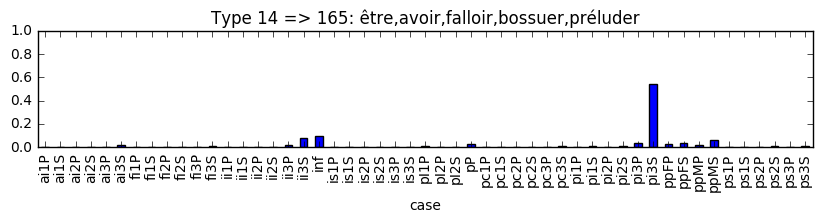

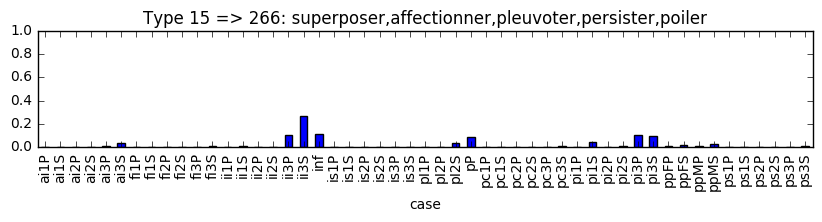

In [168]:
for i in range(nclusters):
    iSum=float(pdKMeans[i].sum())
#    print iSum
    pdKMeans[i]=pdKMeans[i]/iSum
#    print pdKMeans[i]
    ax=pdKMeans[i].plot(kind="bar",figsize=(10, 1.5))
    ax.set_ylim([0,1])
    specLexI=[]
    for l in specialLexemes:
        if l in typeLexemes[i]:
            specLexI.append(l)
            if len(specLexI)>=10:
                break
    nPadLex=5-len(specLexI)
    if nPadLex>0:
        specLexI=specLexI+typeLexemes[i][:nPadLex]
    plt.title("Type %d => %d: "%(i,len(typeLexemes[i]))+",".join(specLexI))
    plt.show()

In [107]:
for element in typeLexemes:
    print element,len(typeLexemes[element]),typeLexemes[element][:10]

0 1138 [u'anordir', u'\xe9ditionner', u'muloter', u'accouer', u'boursicoter', u'miniaturer', u'd\xe9l\xe9aturer', u'd\xe9sulfurer', u'endenter', u'mandriner']
1 489 [u'devenir', u'verser', u'\xe9vider', u'muer', u'd\xe9valoriser', u'emplir', u'menacer', u'appendre', u'opacifier', u'parasiter']
2 844 [u'd\xe9nazifier', u'tancer', u'maquereauter', u'd\xe9sincruster', u'rassortir', u'ragoter', u'coqueter', u'exploser', u'convoler', u'd\xe9rider']
3 826 [u'r\xe9installer', u'd\xe9gommer', u'chauffer', u'moucharder', u'fusionner', u'reporter', u'fustiger', u'b\xe2ter', u'sortir', u'm\xe9moriser']
4 191 [u'gauchir', u'd\xe9ganter', u'rebroder', u'bigarrer', u'braiser', u'boucaner', u'apostiller', u'repl\xe2trer', u'ganter', u'mordorer']
5 545 [u'caner', u'orthographier', u'grossir', u'confisquer', u'd\xe9clencher', u'ratisser', u'typer', u'expectorer', u'profaner', u'plafonner']
6 174 [u'pencher', u'susurrer', u'rugir', u'pr\xe9cipiter', u'tapoter', u'froncer', u'demander', u'improuver', u'r